In [1]:
import ee
import geemap
import datetime
import numpy as np
import matplotlib.pyplot as plt
from dateutil import tz

from sklearn.linear_model import LinearRegression

In [2]:
geemap.ee_initialize()
oeel = geemap.requireJS()
ee.Authenticate()
ee.Initialize(project='ee-amazyar-test1')

(node:5721) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)


!!!!! On 11-07-2022 this code has been updated to run with landsat collection 2 data !!!!!
!!!!! On 11-07-2022 this code has been updated to run with landsat collection 2 data !!!!!
!!!!! On 11-07-2022 this code has been updated to run with landsat collection 2 data !!!!!
!!!!! On 11-07-2022 this code has been updated to run with landsat collection 2 data !!!!!
!!!!! On 11-07-2022 this code has been updated to run with landsat collection 2 data !!!!!


In [3]:
LandsatLST = geemap.requireJS("baikal_vkr_init/Landsat_LST.js")

In [4]:
date_start = ee.Date("1982-08-22T14:19:55") # начало работы Landsat-4
date_end = datetime.datetime.now()
baikal_shape = ee.FeatureCollection('projects/ee-amazyar-test/assets/baikal')
use_ndvi = True

def get_landsat_collection(satellite_name: str):
   coll = LandsatLST.collection(satellite_name, date_start, date_end, baikal_shape, use_ndvi).filter(ee.Filter.lt('CLOUD_COVER', 30))
   return coll.select(['LST'])

In [5]:
def get_average_lst_landsat(landsat_collection: ee.ImageCollection, start_time, end_time):
   temp = landsat_collection.filterDate(start_time, end_time).mean().reduceRegion(reducer=ee.Reducer.median(), geometry=baikal_shape, scale=30, maxPixels=1000000000)
   result_dict = temp.getInfo()
   if(len(result_dict) == 0):
      return None
   return temp.getInfo()['LST']

landsats_collection = ee.ImageCollection.merge(get_landsat_collection('L8'),get_landsat_collection('L9'))
print(8, 9)
landsats_collection = ee.ImageCollection.merge(landsats_collection, get_landsat_collection('L7'))
print(7)
landsats_collection = ee.ImageCollection.merge(landsats_collection, get_landsat_collection('L5'))
print(5)
landsats_collection = ee.ImageCollection.merge(landsats_collection, get_landsat_collection('L4'))
print(4)
landsats_collection

8 9
7
5
4


In [ ]:
lst = {}

for year in range(1983, 2025):
   lst[year] = {}
   for month in range(5, 12):
      start_date = ee.Date(f"{year}-{month}-1")
      if month == 5:
         end_date = ee.Date(f"{year}-5-15")
      else:
         end_date = ee.Date(f"{year}-{(month+1)}-1")
      
      result = get_average_lst_landsat(landsats_collection, start_date, end_date)
      if(result is None):
         continue
      lst[year][month] = result
   
   lst[year] = np.mean(list(lst[year].values()))
   if lst[year] is None:
      del lst[year]

lst

/usr/lib64/python3.13/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib64/python3.13/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{1983: nan,
 1984: nan,
 1985: nan,
 1986: 7.386344357450185,
 1987: 6.05719354886914,
 1988: -1.8781739827112442,
 1989: 9.08322909355249,
 1990: 7.122635178451277,
 1991: 6.153237217555906,
 1992: 0.3924024233400591,
 1993: 9.05932737354679,
 1994: 7.123732266783874,
 1995: 2.5788621701454457,
 1996: 5.881469446816233,
 1997: 5.277491189500572,
 1998: 5.767688124317398,
 1999: 6.023195092521955,
 2000: 4.82593271851187,
 2001: 5.656550599438131,
 2002: 8.320521618972615,
 2003: 6.091757048040242,
 2004: 5.7732563052208645,
 2005: 7.202113676953184,
 2006: 4.677950240759549,
 2007: 7.760961597024208,
 2008: 6.6034717455909435,
 2009: 4.557205862201402,
 2010: 3.6924846642136773,
 2011: 6.23094297749656,
 2012: 7.301778716924498,
 2013: 7.321033256423994,
 2014: 8.591829676073154,
 2015: 8.09153563179101,
 2016: 6.304393132929087,
 2017: 6.452240018513007,
 2018: 7.163009362965876,
 2019: 7.694713990514738,
 2020: 8.664525261832267,
 2021: 6.189892789413902,
 2022: 6.144092465190949,
 

In [7]:
del lst[1983]
del lst[1984]
del lst[1985]

In [ ]:
lst = { 1986: 7.386344357450185,
 1987: 6.05719354886914,
 1988: -1.8781739827112442,
 1989: 9.08322909355249,
 1990: 7.122635178451277,
 1991: 6.153237217555906,
 1992: 0.3924024233400591,
 1993: 9.05932737354679,
 1994: 7.123732266783874,
 1995: 2.5788621701454457,
 1996: 5.881469446816233,
 1997: 5.277491189500572,
 1998: 5.767688124317398,
 1999: 6.023195092521955,
 2000: 4.82593271851187,
 2001: 5.656550599438131,
 2002: 8.320521618972615,
 2003: 6.091757048040242,
 2004: 5.7732563052208645,
 2005: 7.202113676953184,
 2006: 4.677950240759549,
 2007: 7.760961597024208,
 2008: 6.6034717455909435,
 2009: 4.557205862201402,
 2010: 3.6924846642136773,
 2011: 6.23094297749656,
 2012: 7.301778716924498,
 2013: 7.321033256423994,
 2014: 8.591829676073154,
 2015: 8.09153563179101,
 2016: 6.304393132929087,
 2017: 6.452240018513007,
 2018: 7.163009362965876,
 2019: 7.694713990514738,
 2020: 8.664525261832267,
 2021: 6.189892789413902,
 2022: 6.144092465190949,
 2023: 6.882291304703221,
 2024: 7.6525632439371005}

In [8]:
xs = np.array(list(lst.keys())).reshape(-1, 1)
ys = np.array(list(lst.values())).reshape(-1, 1)

xs

array([[1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024]])

In [9]:
regressor = LinearRegression().fit(xs, ys)

<>:24: SyntaxWarning: invalid escape sequence '\i'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\i'
<>:24: SyntaxWarning: invalid escape sequence '\d'


/tmp/ipykernel_5583/3012136392.py:24: SyntaxWarning: invalid escape sequence '\i'
  s=f"$\it{{Тренд = {regressor.coef_[0][0]:.2f}}}{{\degree}}C/год$",
/tmp/ipykernel_5583/3012136392.py:24: SyntaxWarning: invalid escape sequence '\d'
  s=f"$\it{{Тренд = {regressor.coef_[0][0]:.2f}}}{{\degree}}C/год$",


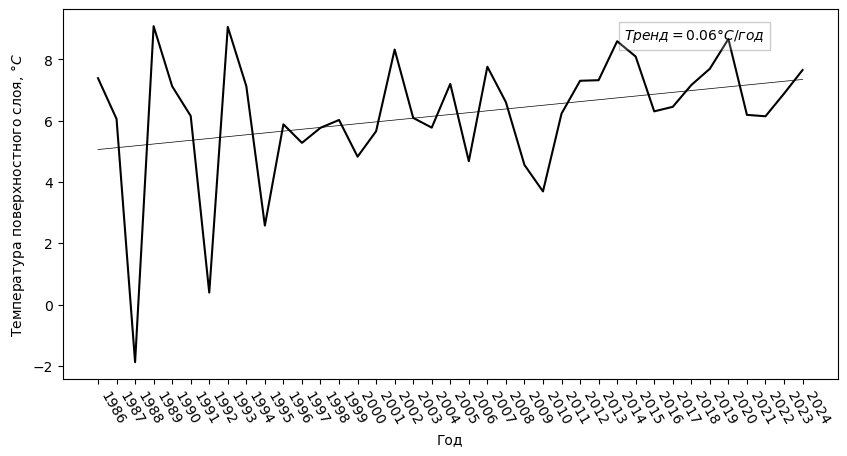

In [10]:
f, ax = plt.subplots()

plt.plot(
    xs,
    ys,
    linewidth=1.5,
    color='black',
    label="Данные"
)

plt.plot(
    xs,
    regressor.predict(xs),
    linewidth=0.5,
    color='black',
    label="Линейная регрессия"
)

plt.xticks(list(lst.keys()), rotation=300, ha='left')

plt.text(
   x=0.815,
   y=0.95,
   s=f"$\it{{Тренд = {regressor.coef_[0][0]:.2f}}}{{\degree}}C/год$",
   horizontalalignment='center',
   verticalalignment='top',
   transform = ax.transAxes, #
   bbox=dict(facecolor='white', alpha=0.2))

plt.xlabel(r"Год")
plt.ylabel(r"Температура поверхностного слоя, ${\degree}C$")

plt.gcf().set_size_inches(10, plt.gcf().get_size_inches()[1])

plt.show()